<font size="5"> <a href="https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=MAC0209"> MAC0209 - Modelagem e Simulação</a> </font>

Roberto M. Cesar Jr. (IME-USP)

Roberto Hirata Jr. (IME-USP)
***
<font size="5"> Métodos aleatórios </font>
***

# Clustering

<ipython-input-2-bdce8ccd8017>:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  v = np.random.multivariate_normal(mean, cov, nSamp)


Espaco original


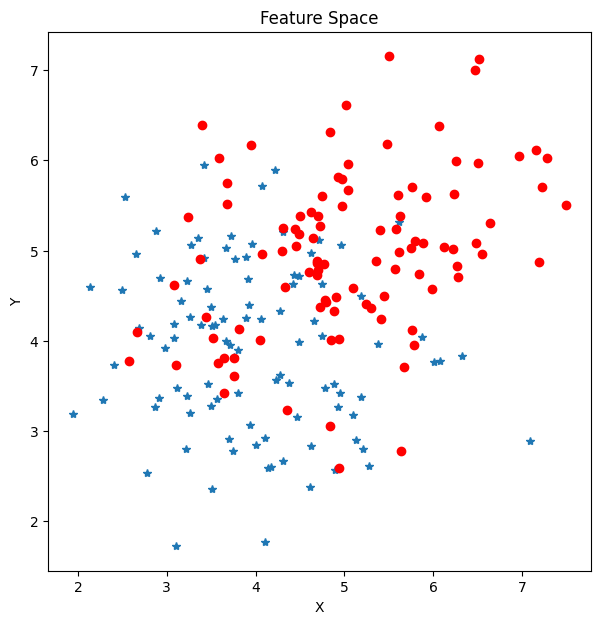

Soma das variancias do ground-truth:  1.8796822135379025


Amostras com rotulos aleatorios


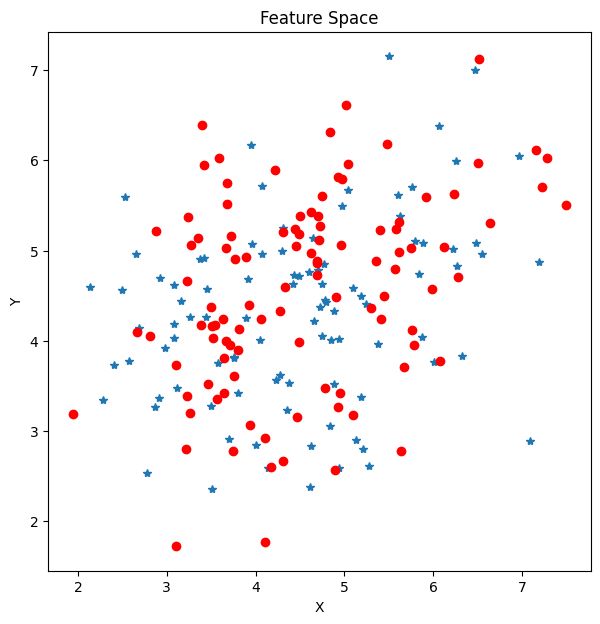

Soma das variancias dos rotulos inicializados aleatoriamente:  2.4352767590358337


Amostras clusterizadas


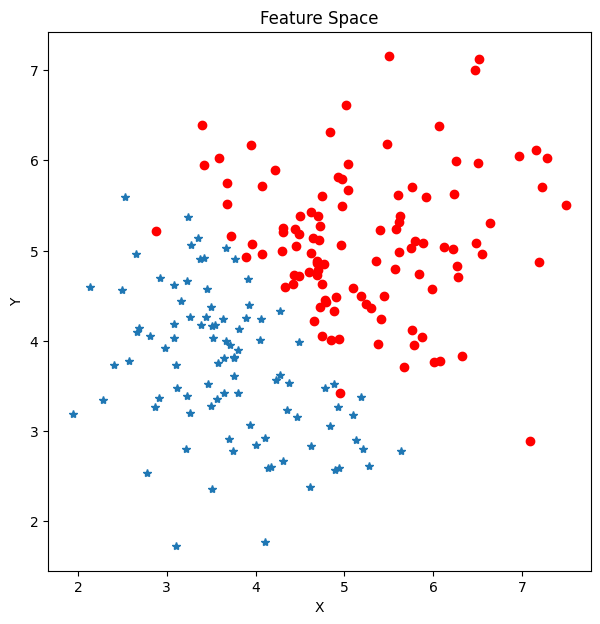

Soma das variancias apos clusterizacao:  1.3745246884626785


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def amostra(mean, cov, lab, nSamp):
  v = np.random.multivariate_normal(mean, cov, nSamp)
  labels = lab*np.ones((nSamp,1))
  v = np.hstack((v,labels))
  return(v)

def plotFeatureSpace(v):
  ind0 = v[:,2] == 0
  ind1 = v[:,2] == 1

  plt.figure(figsize=(7,7))
  plt.plot(v[ind0,0], v[ind0,1], '*')
  plt.plot(v[ind1,0], v[ind1,1], 'ro')

  plt.title("Feature Space");
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

def extractXY(v,lab):
  ind = v[:,2] == lab
  v0 = v[ind]
  v0 = v0[:, [0, 1]]
  return(v0)

def clusterizCostFunction(v):
  var0 = np.var(extractXY(v,0))
  var1 = np.var(extractXY(v,1))
  return(var0+var1)

def clusterize(v):
  N = v.shape[0]
  nGeracoes = 1000
  custoAtual = clusterizCostFunction(v)
  for i in range(nGeracoes):
    ind = np.random.randint(N, size=1)
    lab0 = v[ind,2]
    lab1 = 1 if lab0==0 else 0
    v[ind,2] = lab1
    custoNovo = clusterizCostFunction(v)
    if (custoNovo < custoAtual): custoAtual = custoNovo
    else: v[ind,2] = lab0

    #print(var0)

  return(v)

def printSeparador():
  print()
  print('============================')
  print()

def main():
  nSamp = 100

  mean = [4,4]
  cov = [[1, 0], [0, 1]]
  v0 = amostra(mean,cov,0, nSamp)

  mean = [5,5]
  cov = [[1, 0], [1, 1]]
  v1 = amostra(mean,cov,1, nSamp)

  v = np.vstack((v0,v1))

  print('Espaco original')
  plotFeatureSpace(v)
  print('Soma das variancias do ground-truth: ', clusterizCostFunction(v))

  printSeparador()

  rLabels = np.random.choice([0,1], size=2*nSamp)
  v[:,2] = rLabels.T

  print('Amostras com rotulos aleatorios')
  plotFeatureSpace(v)
  print('Soma das variancias dos rotulos inicializados aleatoriamente: ', clusterizCostFunction(v))

  printSeparador()

  print('Amostras clusterizadas')
  v = clusterize(v)
  plotFeatureSpace(v)
  print('Soma das variancias apos clusterizacao: ', clusterizCostFunction(v))


main()






